## Observations and Insights 

THe data for treatments using Capomulin, Ramicane, Infubinol, and Ceftamin has only one outlier as such the data sample is highly accurate and concrete conclusions can be made using this data.
Capomulin has the lowest standard deviation meaning that the results were more closer to the mean than for any other treatment making it the most accurate to predict for future use.
Avg tumor volume vs. mouse weight for the Capomulin regimen shows a positive co-relation between the two variables proving that mice with higher weights will have more tumor volume. 

In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on=['Mouse ID'], how='outer')
# Display the data table for preview
df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
len(df['Mouse ID'])

1893

In [4]:
# Removing the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df2 = df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

In [5]:
# Checking the number of mice in the clean DataFrame.
len(df2['Mouse ID'])

1888

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

group_df = df2.groupby(['Drug Regimen'])

mean = group_df['Tumor Volume (mm3)'].mean()
median = group_df['Tumor Volume (mm3)'].median()
variance = group_df['Tumor Volume (mm3)'].var()
std_deviation = group_df['Tumor Volume (mm3)'].std()
std_error = group_df['Tumor Volume (mm3)'].sem()

sum_stats = pd.DataFrame({'Mean':mean, 
                            'Median':median,
                            'Variance':variance,
                            'Std Deviation': std_deviation,
                            'Std Error': std_error})

sum_stats

,Mean,Median,Variance,Std Deviation,Std Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
group_df['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:title={'center':'Total Count for all mice tested for each Drug Regimen'}, xlabel='Drug Regimen', ylabel='Total Timepoints'>

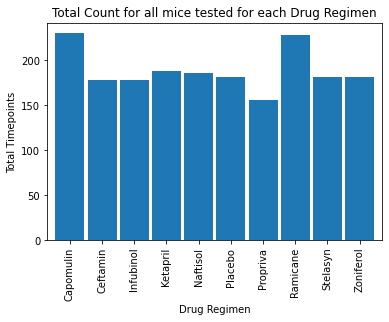

In [8]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

barplot = group_df['Timepoint'].count()
barplot.plot(kind='bar',width=0.9,xlabel='Drug Regimen',ylabel='Total Timepoints', title= "Total Count for all mice tested for each Drug Regimen")

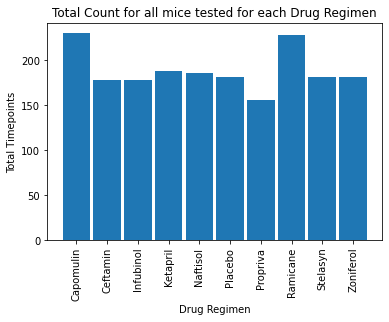

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
barplot_df = pd.DataFrame(barplot)
barplot_df = barplot_df.reset_index()
x_axis = barplot_df['Drug Regimen'].to_list()
y_axis = barplot_df['Timepoint'].to_list()

plt.bar(x_axis,y_axis, width=0.9)
plt.xlabel('Drug Regimen')
plt.ylabel('Total Timepoints')
plt.title("Total Count for all mice tested for each Drug Regimen")
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:title={'center':'Percentage Distribution of Male and Female Mice'}, ylabel='Sex'>

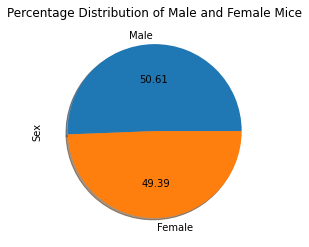

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pieplot = df['Sex'].value_counts()
pieplot.plot(kind='pie',autopct='%.2f', shadow=True, title='Percentage Distribution of Male and Female Mice')

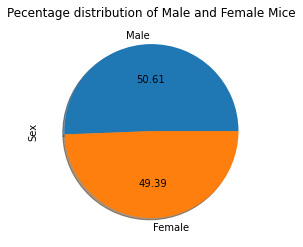

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(pieplot, shadow=True, labels=['Male','Female'], autopct='%.2f')
plt.ylabel('Sex')
plt.title('Pecentage distribution of Male and Female Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
group2_df = pd.DataFrame(df2.groupby(['Mouse ID'])['Timepoint'].max())
group2_df.reset_index()
# group2_df = group2_df.rename(columns={'Timepoint':'Max_Timepoint'}).reset_index()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
data1_df = pd.merge(df2,group2_df, on=['Mouse ID','Timepoint'])
data1_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,5,45.934712,0
245,z435,Propriva,Female,12,26,10,48.710661,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [13]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

vol_data = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

for x in treatments:
    data2_df = data1_df.loc[data1_df['Drug Regimen'] == x,:]
  
    
    vol = data2_df['Tumor Volume (mm3)']
    vol_data.append(vol)

    # Determine outliers using upper and lower bounds
        
    quartiles = vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr) 


    outliers_count = (vol.loc[(data2_df['Tumor Volume (mm3)'] >= upper_bound) | (data2_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    
    print(f"Inner Quartile Range for {x} is {iqr}")
    print(f"{x} have {outliers_count} outliers")

Inner Quartile Range for Capomulin is 7.781863460000004
Capomulin have 0 outliers
Inner Quartile Range for Ramicane is 9.098536719999998
Ramicane have 0 outliers
Inner Quartile Range for Infubinol is 11.477135160000003
Infubinol have 1 outliers
Inner Quartile Range for Ceftamin is 15.577752179999997
Ceftamin have 0 outliers


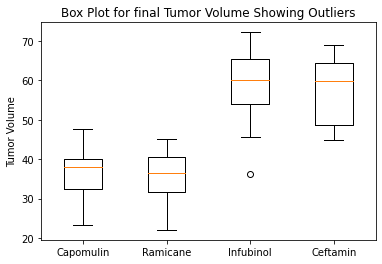

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.boxplot(vol_data)
ax1.set_title('Box Plot for final Tumor Volume Showing Outliers')
plt.ylabel('Tumor Volume')
plt.xticks([1,2,3,4],['Capomulin','Ramicane','Infubinol','Ceftamin'])
plt.show()

## Line and Scatter Plots

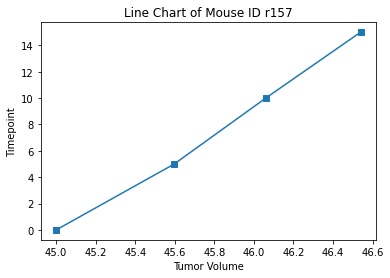

In [15]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
drug = ['Capomulin']

for y in drug:
    data3_df = df2.loc[df2['Drug Regimen'] == y,:]

# data3_df['Mouse ID'] to look for mouse ID treated with Capomulin

data4_df = data3_df.loc[data3_df['Mouse ID'] == 'r157']

plt.plot(data4_df['Tumor Volume (mm3)'],data4_df['Timepoint'], marker='s')
plt.xlabel('Tumor Volume')
plt.ylabel('Timepoint')
plt.title("Line Chart of Mouse ID r157")
plt.show()

In [16]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
data5_df = pd.DataFrame(data3_df.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean())

In [17]:
data5_df = data5_df.rename(columns={'Tumor Volume (mm3)':"Avg Tumor Volume"})

In [18]:
data5_df = data5_df.reset_index()

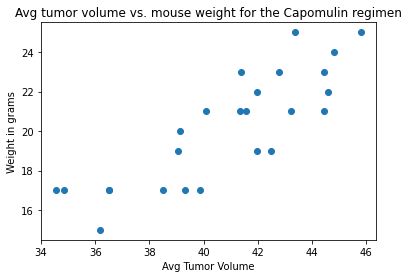

In [19]:
data6_df = pd.merge(data5_df,data3_df, on="Mouse ID", how='outer')
data7_df = data6_df.drop_duplicates(subset=['Mouse ID'],keep='last')

x_val = data7_df['Avg Tumor Volume']
y_val = data7_df['Weight (g)']

plt.scatter(x_val,y_val)
plt.xlabel('Avg Tumor Volume')
plt.ylabel('Weight in grams')
plt.title("Avg tumor volume vs. mouse weight for the Capomulin regimen")
plt.show()

## Correlation and Regression

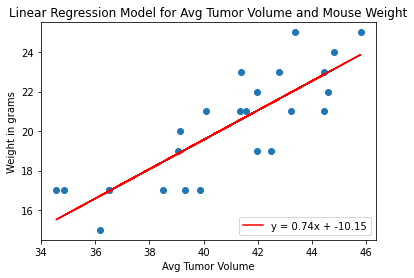

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regression_values = x_val * slope + intercept
line_equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
plt.scatter(x_val, y_val)
plt.plot(x_val, regression_values, 'r-', label=line_equation.format(slope,intercept))
plt.xlabel('Avg Tumor Volume')
plt.ylabel('Weight in grams')
plt.title("Linear Regression Model for Avg Tumor Volume and Mouse Weight")
plt.legend(loc='lower right')
plt.show()